In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

import xarray as xr
print('xarray: %s' % xr.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)


# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version


# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

# Other utilities
import sys
import os


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN


from collections import Counter
from numpy import * 



# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
print(main_dir)

pandas: 1.3.5
xarray: 0.20.1
geopandas: 1.21.5
tensorflow: 2.0.0
Tensorflow/Keras: 2.2.4-tf
pandas: 1.3.5


Using TensorFlow backend.


sklearn: 1.0.2
plotly: 5.6.0
/Users/3rfanian/P_main


In [2]:
test_set = pd.read_csv('data_with_newtarget/test_set_with_newtarget.csv')
validation_set = pd.read_csv('data_with_newtarget/validation_set_with_newtarget.csv')
traning_set = pd.read_csv('data_with_newtarget/traning_set_with_newtarget.csv')

#training with yestersay lsm
traning_df = traning_set['newlsm']
traning_df
ndf = traning_df.iloc[1:]
ndf.loc[4268771,] = 0.0
nd = ndf.reset_index()
del nd["index"]
nd =nd.rename(columns={'newlsm': 'Tomorrow_lsm'})
df2 = traning_set.assign(Tomorrow_lsm=nd)
del df2["Unnamed: 0"]

#validation with yestersay lsm
validation_df = validation_set['newlsm']
ndf_val = validation_df.iloc[1:]
ndf_val.loc[688402,] = 0.0
nd_val = ndf_val.reset_index()
del nd_val["index"]
nd_val =nd_val.rename(columns={'newlsm': 'Tomorrow_lsm'})
df3 = validation_set.assign(Tomorrow_lsm=nd_val)
del df3["Unnamed: 0"]


#test with yestersay lsm
test_df = test_set['newlsm']
ndf_test = test_df.iloc[1:]
ndf_test.loc[539487,] = 0.0
nd_test = ndf_test.reset_index()
del nd_test["index"]
nd_test =nd_test.rename(columns={'newlsm': 'Tomorrow_lsm'})
df4 = test_set.assign(Tomorrow_lsm=nd_test)
del df4["Unnamed: 0"]


training_set_wt = df2
validation_set_wt =df3
test_set_wt = df4


##### Step 2 - Split training data
x_training = training_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******training features******")
#print (x_training)
y_training = training_set_wt[['Tomorrow_lsm']]
print ("******training target******")
#print (y_training)

##### Step 3 - Split test data
x_test = test_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******test features******")
#print (x_test)
y_test = test_set_wt[['Tomorrow_lsm']]
print ("******test target******")
#print (y_test)

##### Step 4 - Split validation data
x_validation = validation_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******validation features******")
#print (x_validation)
y_validation = validation_set_wt[['Tomorrow_lsm']]
print ("******validation target******")
#print (y_validation)

******training features******
******training target******
******test features******
******test target******
******validation features******
******validation target******


In [3]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight

##n_samples / (n_classes * np.bincount(y))
sample_weights = compute_sample_weight(class_weight = 'balanced', 
                                                  y = y_training)

In [ ]:
##### Step 5 - Specify the structure of a Neural Network
model_Sample_Weighting = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpointsamplewrighting'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='min',
    save_best_only=True)


model_Sample_Weighting.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_Sample_Weighting.fit(x_training, y_training, sample_weight=sample_weights, epochs = 20 ,callbacks=[model_checkpoint_callback],   validation_data=(x_validation, y_validation))#*********more epochs = 5


In [11]:
model_Sample_Weighting.save('model_Sample_Weighting_8n_1l')
model_Sample_Weighting.save('model_Sample_Weighting_8n_1l.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2022-07-10 12:20:35.441807: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_Sample_Weighting_8n_1l/assets



-------------------- Model Summary --------------------
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_4
Layer:  Hidden-Layer1
Layer:  dropout_4
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
       

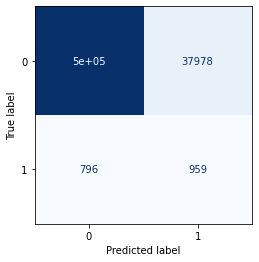

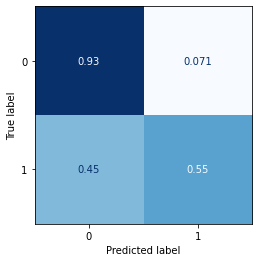

In [12]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_Sample_Weighting_1l_8n = (model_Sample_Weighting.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_Sample_Weighting_1l_8n = (model_Sample_Weighting.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_Sample_Weighting.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_Sample_Weighting.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_Sample_Weighting_1l_8n))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_Sample_Weighting_1l_8n))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_Sample_Weighting_1l_8n)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_Sample_Weighting_1l_8n,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)




-------------------- Model Summary --------------------
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________



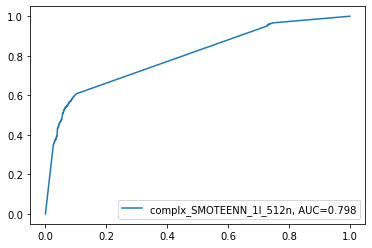

In [13]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_Sample_Weighting_1l_8n_prob = (model_Sample_Weighting.predict(x_training))
# Predict class labels on a test data
pred_labels_te_Sample_Weighting_1l_8n_prob = (model_Sample_Weighting.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_Sample_Weighting.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_Sample_Weighting_1l_8n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_Sample_Weighting_1l_8n_prob), 4)
plt.plot(fpr,tpr,label="complx_SMOTEENN_1l_512n, AUC="+str(auc))





#add legend
plt.legend()

In [14]:
##### Step 5 - Specify the structure of a Neural Network
model_complx_Sample_Weighting_512n_1l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpoint_complx_Sample_Weighting_512n_1l'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model_complx_Sample_Weighting_512n_1l.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_complx_Sample_Weighting_512n_1l.fit(x_training, y_training, sample_weight=sample_weights, epochs = 10 ,callbacks=[model_checkpoint_callback],   validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 4268771 samples, validate on 688402 samples
Epoch 1/10
4268771/4268771 [==============================] - 579s 136us/sample - loss: 0.6534 - accuracy: 0.6905 - val_loss: 0.5740 - val_accuracy: 0.7667
Epoch 2/10
4268771/4268771 [==============================] - 552s 129us/sample - loss: 0.6316 - accuracy: 0.7049 - val_loss: 0.1026 - val_accuracy: 0.9874
Epoch 3/10
4268771/4268771 [==============================] - 680s 159us/sample - loss: 0.6418 - accuracy: 0.7054 - val_loss: 0.5352 - val_accuracy: 0.8002
Epoch 4/10
4268771/4268771 [==============================] - 600s 141us/sample - loss: 0.6457 - accuracy: 0.7013 - val_loss: 0.2175 - val_accuracy: 0.9720
Epoch 5/10
4268771/4268771 [==============================] - 566s 132us/sample - loss: 0.6420 - accuracy: 0.7057 - val_loss: 0.6096 - val_accuracy: 0.7430
Epoch 6/10
4268771/4268771 [==============================] - 563s 132us/sample - loss: 0.6417 - accuracy: 0.7059 - val_loss: 0.8039 - val_accuracy: 0.6755
Epoch 7/10


In [15]:
model_complx_Sample_Weighting_512n_1l.save('model_complx_Sample_Weighting_512n_1l')
model_complx_Sample_Weighting_512n_1l.save('model_complx_Sample_Weighting_512n_1l.h5')

INFO:tensorflow:Assets written to: model_complx_Sample_Weighting_512n_1l/assets



-------------------- Model Summary --------------------
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_5
Layer:  Hidden-Layer1
Layer:  dropout_5
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
 

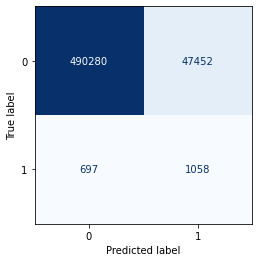

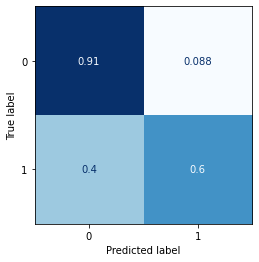

In [16]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complex_Weighting_1l_512n = (model_complx_Sample_Weighting_512n_1l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complex_Weighting_1l_512n = (model_complx_Sample_Weighting_512n_1l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complx_Sample_Weighting_512n_1l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_complx_Sample_Weighting_512n_1l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complex_Weighting_1l_512n))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complex_Weighting_1l_512n))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complex_Weighting_1l_512n)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complex_Weighting_1l_512n,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)




-------------------- Model Summary --------------------
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________



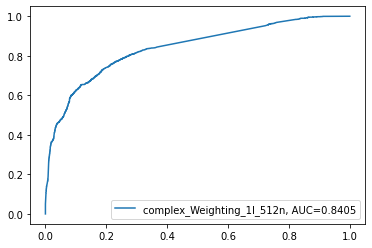

In [17]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complex_Weighting_1l_512n_prob = (model_complx_Sample_Weighting_512n_1l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complex_Weighting_1l_512n_prob = (model_complx_Sample_Weighting_512n_1l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complx_Sample_Weighting_512n_1l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complex_Weighting_1l_512n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complex_Weighting_1l_512n_prob), 4)
plt.plot(fpr,tpr,label="complex_Weighting_1l_512n, AUC="+str(auc))





#add legend
plt.legend()

In [9]:
##### Step 5 - Specify the structure of a Neural Network
model_complx_Sample_Weighting_256n_4l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpoint_model_complx_Sample_Weighting_256n_4l'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


model_complx_Sample_Weighting_256n_4l.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_complx_Sample_Weighting_256n_4l.fit(x_training, y_training, sample_weight=sample_weights, epochs = 2 ,callbacks=[model_checkpoint_callback],   validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 4268771 samples, validate on 688402 samples
Epoch 1/2
4268771/4268771 [==============================] - 959s 225us/sample - loss: 0.6631 - accuracy: 0.6515 - val_loss: 0.5834 - val_accuracy: 0.8692
Epoch 2/2
4268771/4268771 [==============================] - 928s 217us/sample - loss: 0.6375 - accuracy: 0.6726 - val_loss: 0.2412 - val_accuracy: 0.9891


In [10]:
model_complx_Sample_Weighting_256n_4l.save('model_complx_Sample_Weighting_256n_4l')
model_complx_Sample_Weighting_256n_4l.save('model_complx_Sample_Weighting_256n_4l.h5')

INFO:tensorflow:Assets written to: model_complx_Sample_Weighting_256n_4l/assets



-------------------- Model Summary --------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_______________________________________________________________

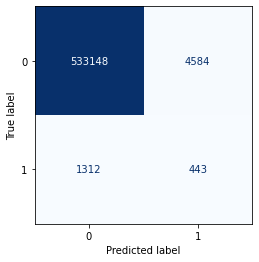

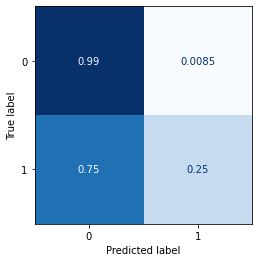

In [11]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_Sample_Weighting_256n_4l = (model_complx_Sample_Weighting_256n_4l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complx_Sample_Weighting_256n_4l = (model_complx_Sample_Weighting_256n_4l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complx_Sample_Weighting_256n_4l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_complx_Sample_Weighting_256n_4l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complx_Sample_Weighting_256n_4l))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complx_Sample_Weighting_256n_4l))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_Sample_Weighting_256n_4l)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_Sample_Weighting_256n_4l,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)




-------------------- Model Summary --------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_______________________________________________________________

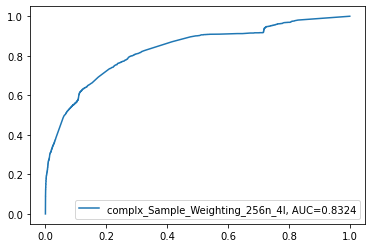

In [12]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_Sample_Weighting_256n_4l_prob = (model_complx_Sample_Weighting_256n_4l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complx_Sample_Weighting_256n_4l_prob = (model_complx_Sample_Weighting_256n_4l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complx_Sample_Weighting_256n_4l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_Sample_Weighting_256n_4l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_Sample_Weighting_256n_4l_prob), 4)
plt.plot(fpr,tpr,label="complx_Sample_Weighting_256n_4l, AUC="+str(auc))





#add legend
plt.legend()

In [3]:
model_complx_Sample_Weighting_256n_4l = tf.keras.models.load_model('model_complx_Sample_Weighting_256n_4l')

# Check its architecture
model_complx_Sample_Weighting_256n_4l.summary()

##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_Sample_Weighting_256n_4l_prob = (model_complx_Sample_Weighting_256n_4l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complx_Sample_Weighting_256n_4l_prob = (model_complx_Sample_Weighting_256n_4l.predict(x_test))
#> 0.01).astype(int)

2022-07-13 09:17:19.914085: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-13 09:17:19.915639: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                

In [4]:
model_complx_Sample_Weighting_512n_1l = tf.keras.models.load_model('model_complx_Sample_Weighting_512n_1l')

# Check its architecture
model_complx_Sample_Weighting_512n_1l.summary()

##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_Sample_Weighting_512n_1l_prob = (model_complx_Sample_Weighting_512n_1l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complx_Sample_Weighting_512n_1l_prob = (model_complx_Sample_Weighting_512n_1l.predict(x_test))
#> 0.01).astype(int)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_Sample_Weighting_8n_1l = tf.keras.models.load_model('model_Sample_Weighting_8n_1l')

# Check its architecture
model_Sample_Weighting_8n_1l.summary()

##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_Sample_Weighting_8n_1l_prob = (model_Sample_Weighting_8n_1l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_Sample_Weighting_8n_1l_prob = (model_Sample_Weighting_8n_1l.predict(x_test))
#> 0.01).astype(int)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


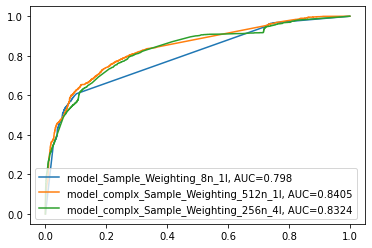

In [7]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_Sample_Weighting_8n_1l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_Sample_Weighting_8n_1l_prob), 4)
plt.plot(fpr,tpr,label="model_Sample_Weighting_8n_1l, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_Sample_Weighting_512n_1l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_Sample_Weighting_512n_1l_prob), 4)
plt.plot(fpr,tpr,label="model_complx_Sample_Weighting_512n_1l, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_Sample_Weighting_256n_4l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_Sample_Weighting_256n_4l_prob), 4)
plt.plot(fpr,tpr,label="model_complx_Sample_Weighting_256n_4l, AUC="+str(auc))



#add legend
plt.legend()